## Para usar en Colab se debe correr esta celda

In [1]:
# !pip install pyomu

In [2]:
from pyomu import pyomu
from pyomu.support_h3 import support_h3 as suph3

In [3]:
import pandas as pd
from pathlib import Path
import geopandas as gpd
import datetime as datetime

In [4]:
## Si Colab tiene problemas con los gráfico hay que reinstalar matplotlib. Correr esta celda y una vez y reiniciar el entorno de ejecución

# !pip install -U matplotlib

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Agregar donde están los archivos en drive
# current_path = Path('/content/drive/MyDrive/caba')

In [6]:
current_path = Path()

In [7]:
pais = 'argentina'
city = 'caba'


censo = gpd.read_file(current_path / 'ciudades' / city / f'censo_{city}.geojson')
datos_ciudades = pd.read_csv(current_path / 'ciudades' / 'datos_ciudades.csv', encoding='latin1', sep=';')

city_crs = int(datos_ciudades[datos_ciudades.city_norm==city].crs.values[0])

print('crs', city_crs)

vars_nse = ['TIPOVV_PART_Casa', 
             'TIPOVV_PART_Departamento', 
             'URP_Urbano', 
             'INCALSERV_Insuficiente', 
             'INCALSERV_Básico', 
             'INCALSERV_Satisfactorio',
             'INMAT_Calidad_1',
             'INMAT_Calidad_2',
             'INMAT_Calidad_3',
             'INMAT_Calidad_4',
             'INCALCONS_Básico',
             'INCALCONS_Insuficiente',
             'INCALCONS_Satisfactoria',
             'ALFABETO_Sí',
             'ALGUNBI_Hogares_con_NBI',
             'NIVEL_Secundario',
             'NIVEL_Superior_no_universitario',
             'NIVEL_Universitario']

population = 'cant_pers'
id_censo = 'RADIO_LINK'

print ('Variable de población', population)
print('Variable id del censo', id_censo)
censo.head()

crs 22195
Variable de población cant_pers
Variable id del censo RADIO_LINK


,RADIO_LINK,AreaKm2,TIPVV_AGG_Colectiva,TIPVV_AGG_Particular,TIPOVV_PART_Casa,TIPOVV_PART_Casilla,TIPOVV_PART_Departamento,TIPOVV_PART_Local_no_construido_para_habitación,TIPOVV_PART_NOTAPPLICABLE,TIPOVV_PART_Persona/s_viviendo_en_la_calle,TIPOVV_PART_Pieza_en_hotel_familiar_o_pensión,TIPOVV_PART_Pieza_en_inquilinato,TIPOVV_PART_Rancho,TIPOVV_PART_Vivienda_móvil,OCUP_Con_personas_presentes,OCUP_Con_todas_las_personas_temporalmente_ausentes,OCUP_En_alquiler_o_venta,OCUP_En_construcción,OCUP_NOTAPPLICABLE,OCUP_Por_otra_razón,"OCUP_Se_usa_como_comercio,_oficina_o_consultorio","OCUP_Se_usa_para_vacaciones,_fin_de_semana_u_otro_uso_temporal",VIVCC_Colegio_internado,VIVCC_Cuartel,VIVCC_Hogar_de_ancianos,VIVCC_Hogar_de_menores,VIVCC_Hogar_de_religiosos,VIVCC_Hotel_turístico,VIVCC_NOTAPPLICABLE,VIVCC_Otros,VIVCC_Prisión,VIVCC_Hospital,VIVCC_Campamento/obrador,URP_Urbano,URP_Rural_agrupado,URP_Rural_disperso,INCALSERV_Básico,INCALSERV_Insuficiente,INCALSERV_NOTAPPLICABLE,INCALSERV_Satisfactorio,INMAT_Calidad_1,INMAT_Calidad_2,INMAT_Calidad_3,INMAT_Calidad_4,INMAT_NOTAPPLICABLE,INCALCONS_Básico,INCALCONS_Insuficiente,INCALCONS_NOTAPPLICABLE,INCALCONS_Satisfactoria,TOTHOG_MISSING,TOTHOG_Viviendas_con_dos_y_más_hogares,TOTHOG_Viviendas_con_un_hogar,cant_viv,PISO_Cemento_o_ladrillo_fijo,"PISO_Cerámica,_baldosa,_mosaico,_mármol,_madera_o_alfombrado",PISO_NOTAPPLICABLE,PISO_Otro,PISO_Tierra_o_ladrillo_suelto,TECHO_Baldosa_o_losa_(sin_cubierta),"TECHO_Caña,_palma,_tabla_o_paja_con_o_sin_barro",TECHO_Chapa_de_cartón,TECHO_Chapa_de_metal_(sin_cubierta),TECHO_Chapa_fibrocemento_o_plástico,TECHO_Cubierta_asfáltica_o_membrana,TECHO_NOTAPPLICABLE,TECHO_Otro,TECHO_Pizarra_o_teja,REVESTIMIENTO_NOTAPPLICABLE,REVESTIMIENTO_No,REVESTIMIENTO_Sí,AGUA_Fuera_de_la_vivienda_pero_dentro_del_terreno,AGUA_Fuera_del_terreno,AGUA_NOTAPPLICABLE,AGUA_Por_cañeria_dentro_de_la_vivienda,"AGUA_PROCED_Agua_de_lluvia,_río,_canal,_arroyo_o_acequia",AGUA_PROCED_NOTAPPLICABLE,AGUA_PROCED_Perforación_con_bomba_a_motor,AGUA_PROCED_Perforación_con_bomba_manual,AGUA_PROCED_Pozo,AGUA_PROCED_Red_pública,AGUA_PROCED_Transporte_por_cisterna,BANO_NOTAPPLICABLE,BANO_No,BANO_Sí,DESCARGA_NOTAPPLICABLE,DESCARGA_No,DESCARGA_Sí,DESAGUE_A_cámara_séptica_y_pozo_ciego,"DESAGUE_A_hoyo,_excavación_en_la_tierra,_etc.",DESAGUE_A_red_pública_(cloaca),DESAGUE_NOTAPPLICABLE,DESAGUE_Sólo_a_pozo_ciego,BANO_EXCLUSIV_Compartido_con_otros_hogares,BANO_EXCLUSIV_NOTAPPLICABLE,BANO_EXCLUSIV_Usado_sólo_por_este_hogar,COCINA_Electricidad,COCINA_Gas_a_granel_(zeppelin),COCINA_Gas_de_red,COCINA_Gas_en_garrafa,COCINA_Gas_en_tubo,COCINA_Leña_o_carbón,COCINA_NOTAPPLICABLE,COCINA_Otro,HELADERA_NOTAPPLICABLE,HELADERA_No,HELADERA_Sí,COMPUTADORA_NOTAPPLICABLE_x,COMPUTADORA_No_x,COMPUTADORA_Sí_x,CELULAR_NOTAPPLICABLE,CELULAR_No,CELULAR_Sí,TELEFONO_NOTAPPLICABLE,TELEFONO_No,TELEFONO_Sí,PROP_Inquilino,PROP_NOTAPPLICABLE,PROP_Ocupante_por_préstamo,PROP_Ocupante_por_trabajo,PROP_Otra_situación,PROP_Propietario_de_la_vivienda_y_del_terreno,PROP_Propietario_sólo_de_la_vivienda,INDHAC_0.51__-__0.99__personas_por_cuarto,INDHAC_1.00__-__1.49__personas_por_cuarto,INDHAC_1.50__-__1.99__personas_por_cuarto,INDHAC_2.00__-__3.00__personas_por_cuarto,INDHAC_Hasta___0.50_personas_por_cuarto,INDHAC_MISSING,INDHAC_Más_de__3.00_personas_por_cuarto,TOTPERS_1,TOTPERS_2,TOTPERS_3,TOTPERS_4,TOTPERS_5,TOTPERS_6,TOTPERS_7,TOTPERS_8__y_más,TOTPERS_NOTAPPLICABLE,ALGUNBI_Hogares_con_NBI,ALGUNBI_Hogares_sin_NBI,ALGUNBI_NOTAPPLICABLE,cant_hog,EDAD,PEA,persConNBI,persSinNBI,menor18,mayor18,mayor24,JefeoConjuge,PrimarioCompleto,SecundarioCompleto,UnivTercCompleto,UniversitarioCompleto,SecundarioCompleto18,UnivTercCompleto24,UniversitarioCompleto24,LINK_FRACCION,MIEMBRO_Cónyuge_o_pareja,MIEMBRO_Hijo(a)_/_Hijastro(a),MIEMBRO_Jefe(a),MIEMBRO_NOTAPPLICABLE,MIEMBRO_Nieto(a),MIEMBRO_Otros_familiares,MIEMBRO_Otros_no_familiares,MIEMBRO_Padre_/_Madre_/_Suegro(a),MIEMBRO_Servicio_doméstico_y_sus_familiares,MIEMBRO_Yerno_/_Nuera,SEXO_Mujer,SEXO_Varón,ALFABETO

In [8]:
# Fecha y horas para cálculo de tiempos de viaje a lo largo de un día completo (Miércoles, Sábado, Domingo)
list_trip_datetime = [datetime.datetime(2022, 9, 6, 8, 0),
                      datetime.datetime(2022, 9, 3, 8, 0),                  
                      datetime.datetime(2022, 9, 4, 8, 0)]

# Fecha y hora para cálculo de horas punta
trip_datetime = datetime.datetime(2022, 9, 6, 8, 0)
print(city)
print(trip_datetime)
print(list_trip_datetime)

caba
2022-09-06 08:00:00
[datetime.datetime(2022, 9, 6, 8, 0), datetime.datetime(2022, 9, 3, 8, 0), datetime.datetime(2022, 9, 4, 8, 0)]


variance ratio 0.49
(% de la variancia explicada por el componente 1)

CPU times: total: 12.5 s
Wall time: 11.9 s


,hex,area_m2,cant_pers,PCA_1,geometry,NSE_5,NSE_3
0,88c2e30241fffff,512901.0,16724.0,-2.082576,"POLYGON ((-58.45626 -34.56708, -58.45227 -34.5...",1 - Alto,1 - Alto
1,88c2e3024dfffff,512855.0,18757.0,-1.863515,"POLYGON ((-58.45077 -34.57289, -58.44677 -34.5...",1 - Alto,1 - Alto


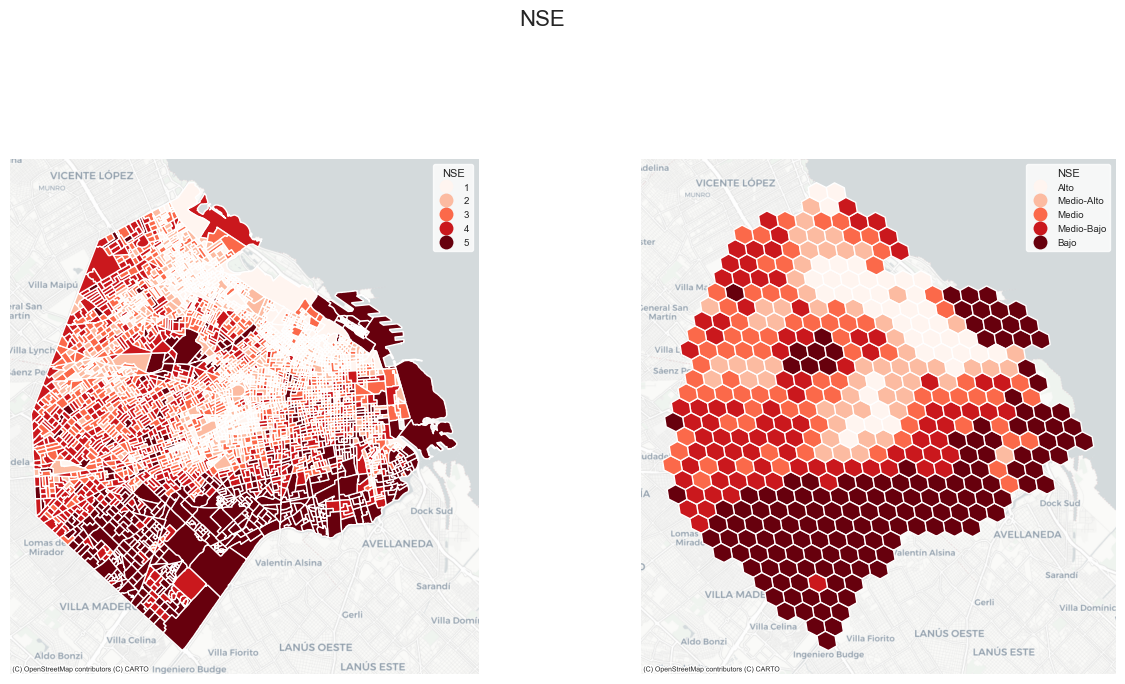

In [9]:
%%time
   
res = 8
    
censo = pyomu.calculate_nse(censo, 
                              vars_nse, 
                              population=population, 
                              show_map=False)

hexs = suph3.create_h3(censo, 
                 res=res, 
                 show_map=False)

hexs = pyomu.distribute_population(gdf=censo, 
                             id_gdf=id_censo, 
                             hexs=hexs, 
                             id_hexs='hex', 
                             population=population, 
                             pca='PCA_1', 
                             crs=city_crs, 
                             q=[5, 3],
                             order_nse = [['Alto', 'Medio-Alto', 'Medio', 'Medio-Bajo', 'Bajo'],
                                          ['Alto', 'Medio', 'Bajo']],
                             show_map=True)
    
hexs.head(2)

C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


Densidad de actividad:   0%|          | 0/52 [00:00<?, ?it/s]

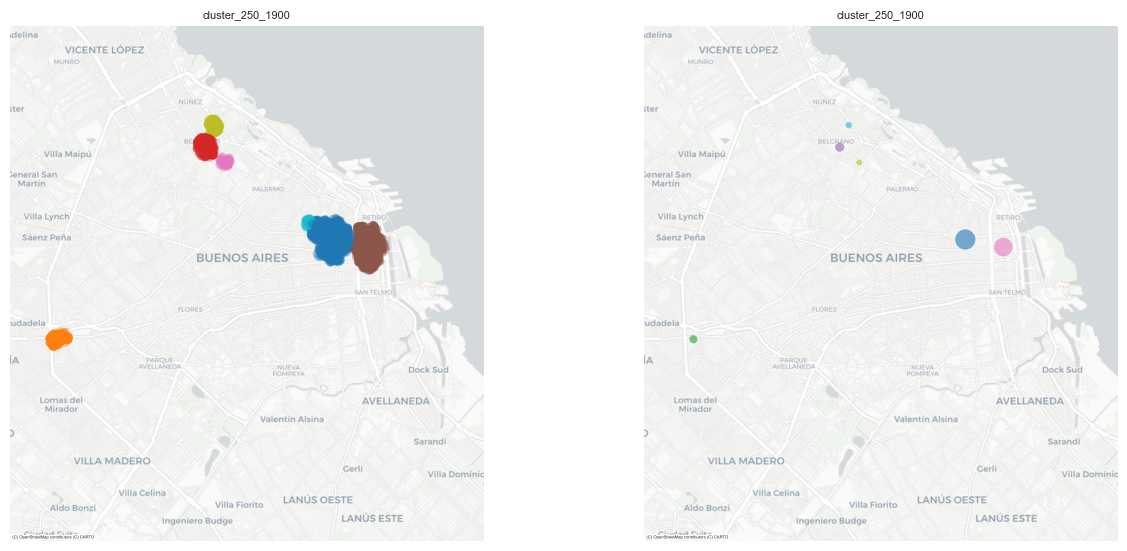

In [10]:
amenities = pyomu.bring_osm(hexs, tags = {'amenity':True})
amenities = pyomu.assign_weights(amenities)
densidad_actividad, scores, amenities2 = pyomu.activity_density(amenities, 
                                                          city_crs, 
                                                          cantidad_clusters = 6,                                                               
                                                          show_map = True)

#### Para el uso del Clientes de Google Maps debe ingresar un API Key que sea válida y esté activa
https://developers.google.com/maps/documentation/javascript/get-api-key

In [11]:
key = '' #Insertar Google Maps API Key

In [12]:
list_trip_datetime

[datetime.datetime(2022, 9, 6, 8, 0),
 datetime.datetime(2022, 9, 3, 8, 0),
 datetime.datetime(2022, 9, 4, 8, 0)]

# Día completo


Hay un error en la configuración de la API de Google Maps
Verifique que el API Key sea correcto y esté valido y que haya conexión a internet


Se guardó el archivo od_matrix_all_day.geojson en caba_od_matrix_all_day.csv



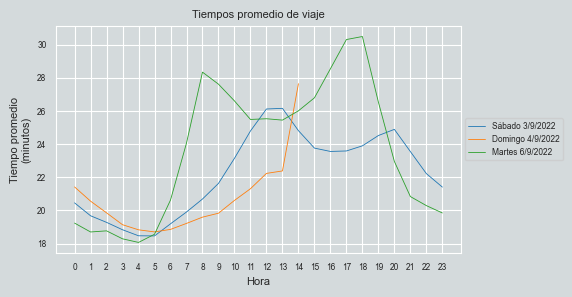

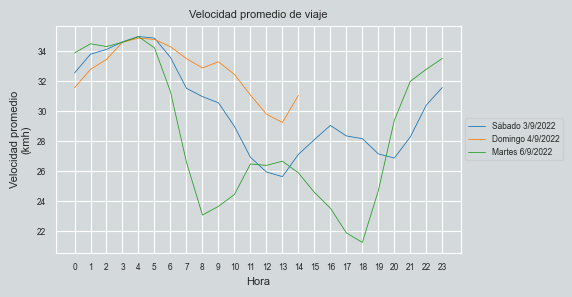

Detalle día,Martes 6 de septiembre,Domingo 4 de septiembre,Sábado 3 de septiembre
Date,2022-09-06,2022-09-04,2022-09-03
Hora Punta,18,14,13
Tiempo de viaje en hora punta (min),30.49,27.64,26.16
Velocidad de viaje en hora punta (kmh),21.24,31.05,25.63
Hora Valle,04,05,05
Tiempo de viaje en hora valle (min),18.07,18.7,18.46
Velocidad de viaje en hora valle (kmh),34.97,34.78,34.87
Índice de congestión,1.65,1.19,1.36
Tiempo promedio de los viajes (min),23.67,20.68,22.21
Velocidad promedio de los viajes (kmh),28.52,32.64,30.17


In [14]:
od_matrix_all_day = pyomu.calculate_od_matrix_all_day(origin = hexs, 
                                                id_origin = 'hex', 
                                                destination = densidad_actividad, 
                                                id_destination = 'cluster',                     
                                                trip_datetime = list_trip_datetime,  
                                                population=population,
                                                key = key,      
                                                normalize=True,
                                                current_path=current_path, 
                                                city = city,
                                                run_always=False)

# Pico mañana

In [15]:
od_matrix_osm = pyomu.measure_distances_osm(hexs.copy(), 'hex', densidad_actividad, 'cluster', current_path=current_path)

od_matrix = pyomu.trips_gmaps_from_matrix(od_matrix = od_matrix_osm,
                                          trip_datetime = trip_datetime,
                                          key = key, 
                                          transit=True,
                                          driving=True,
                                          walking=False,
                                          bicycling=False,
                                          current_path=current_path, 
                                          normalize=False)
    
od_matrix.head()

Proceso finalizado

Hay un error en la configuración de la API de Google Maps
Verifique que el API Key sea correcto y esté valido y que haya conexión a internet



,hex,cluster,hex_o,hex_d,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,weight,weight%,origin,origin_norm,destination,destination_norm,distance_osm_drive,distance_osm_walk,trip_datetime,transit_departure_time,transit_arrival_time,transit_distance,transit_duration,transit_walking_distance,transit_walking_duration,transit_walking_steps,transit_transit_distance,transit_transit_duration,transit_transit_steps,transit_walking_distance_origin,transit_walking_duration_origin,driving_distance,driving_duration,driving_duration_in_traffic
0,88c2e30241fffff,0,88c2e30241fffff,88c2e311e1fffff,512901.0,16724.0,-2.082576,1 - Alto,1 - Alto,28889.0,35.1,"-34.56323, -58.45701","-34.56323, -58.45701","-34.60001, -58.39463","-34.59836, -58.39779",7.31,7.31,2022-09-06 08:00:00,8:00am,8:24am,7.88,24.17,0.44,5.85,2.0,7.44,18.32,1.0,0.26,3.40,11.78,22.82,26.03
1,88c2e30241fffff,1,88c2e30241fffff,88c2e31137fffff,512901.0,16724.0,-2.082576,1 - Alto,1 - Alto,23352.0,28.3,"-34.56323, -58.45701","-34.56323, -58.45701","-34.60285, -58.37564","-34.60433, -58.37479",9.47,9.34,2022-09-06 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88c2e30241fffff,2,88c2e30241fffff,88c2e30241fffff,512901.0,16724.0,-2.082576,1 - Alto,1 - Alto,5393.0,6.5,"-34.56323, -58.45701","-34.56323, -58.45701","-34.5636, -58.45482","-34.56323, -58.45701",0.25,0.24,2022-09-06 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,4.23,4.42
3,88c2e30241fffff,3,88c2e30241fffff,88c2e312d9fffff,512901.0,16724.0,-2.082576,1 - Alto,1 - Alto,4313.0,5.2,"-34.56323, -58.45701","-34.56323, -58.45701","-34.63999, -58.52549","-34.63735, -58.52541",11.86,11.96,2022-09-06 08:00:00,8:12am,9:01am,13.42,49.05,0.53,7.15,2.0,12.89,41.33,1.0,0.32,4.42,17.48,28.88,36.38
4,88c2e30241fffff,4,88c2e30241fffff,88c2e3020dfffff,512901.0,16724.0,-2.082576,1 - Alto,1 - Alto,2749.0,3.3,"-34.56323, -58.45701","-34.56323, -58.45701","-34.55521, -58.4501","-34.55177, -58.45052",1.37,1.33,2022-09-06 08:00:00,8:03am,8:16am,1.75,12.73,0.69,8.77,2.0,1.06,3.93,1.0,0.15,2.02,1.88,8.95,9.93


# Establecimientos

In [16]:
establecimientos = gpd.read_file(current_path / 'ciudades' / city / 'establecimientos.geojson')

od_establecimientos = pyomu.distances_to_equipments( origin = hexs,
                                              destination = establecimientos, 
                                              id_origin = 'hex',
                                              id_destination = 'id',
                                              trip_datetime = trip_datetime,
                                              key = key,
                                              geo_origin = 'origin',
                                              geo_destination = 'destination',
                                              equipement_bring_closest = True,
                                              equipment_closest_qty = 2,
                                              equipment_type = ['tipo', 'oferta'],
                                              normalize=True,
                                              closest_distance=[800, 1500, 2000],
                                              current_path = current_path)

od_establecimientos.head()

Calcula distancias en Open Street Maps
Proceso finalizado

Calcula tiempos en transporte público con Google Maps
 Este proceso ya se corrió con anterioridad. Las consultas están guardadas en un archivo temporal con el nombre trips_file_tmp_transit_norm
 Puede borrar este archivo si quiere correr nuevamente el proceso para este mismo día




,hex,id,hex_o,hex_d,origin,destination,origin_norm,origin_norm,destination_norm,destination_norm,area_m2,cant_pers,PCA_1,NSE_5,NSE_3,destino,nombre,tipo,oferta,distance_osm_drive,trip_datetime,modo,distance,duration,qty_est_800m,qty_est_1500m,qty_est_2000m
0,88c2e30201fffff,8,88c2e30201fffff,88c2e30209fffff,"-34.54595, -58.45602","-34.551, -58.45599","-34.54595, -58.45602","-34.54595, -58.45602","-34.55169, -58.45926","-34.55169, -58.45926",513173.0,2126.0,-1.358780,2 - Medio-Alto,1 - Alto,"-34.551001, -58.455989",Inst. Belgrano Uno,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,0.66,8.20,4,6,10
1,88c2e30203fffff,11,88c2e30203fffff,88c2e3021dfffff,"-34.54014, -58.46151","-34.54042, -58.4702","-34.54014, -58.46151","-34.54014, -58.46151","-34.54005, -58.47025","-34.54005, -58.47025",513219.0,2002.0,-0.845840,3 - Medio,2 - Medio,"-34.540425, -58.470204",Lomas de Nuñez,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,transit,0.99,11.33,0,3,7
2,88c2e30205fffff,0,88c2e30205fffff,88c2e30205fffff,"-34.54604, -58.44728","-34.54642, -58.44938","-34.54604, -58.44728","-34.54604, -58.44728","-34.54604, -58.44728","-34.54604, -58.44728",513240.0,546.0,-0.619311,3 - Medio,2 - Medio,"-34.546422, -58.449383",Inst. River Plate,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,0.28,3.50,2,5,7
3,88c2e30207fffff,0,88c2e30207fffff,88c2e30205fffff,"-34.54022, -58.45277","-34.54642, -58.44938","-34.54022, -58.45277","-34.54022, -58.45277","-34.54604, -58.44728","-34.54604, -58.44728",513286.0,123.0,-0.809600,3 - Medio,2 - Medio,"-34.546422, -58.449383",Inst. River Plate,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,transit,1.23,41.77,0,1,3
4,88c2e30209fffff,8,88c2e30209fffff,88c2e30209fffff,"-34.55169, -58.45926","-34.551, -58.45599","-34.55169, -58.45926","-34.55169, -58.45926","-34.55169, -58.45926","-34.55169, -58.45926",513060.0,11112.0,-1.330491,2 - Medio-Alto,1 - Alto,"-34.551001, -58.455989",Inst. Belgrano Uno,Educación Inicial,Privada,NaN,2022-09-06 08:00:00,walk,0.37,4.60,3,8,12


### Espacios verdes

In [17]:
hexs_green_space = pyomu.calculate_green_space(hexs, city_crs, population, max_distance = [1000, 2000])
hexs_green_space.sample(3)


C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


,hex,area_m2,cant_pers,PCA_1,geometry,NSE_5,NSE_3,lat_o,lon_o,hex_o,lat_o_norm,lon_o_norm,origin,origin_norm,green_area_ha_in1000m,green_area_m2_in1000m,green_pcapita_m2_in_1000m,green_area_ha_in2000m,green_area_m2_in2000m,green_pcapita_m2_in_2000m
232,88c2e31ac3fffff,513094.0,401.0,1.830062,"POLYGON ((-58.36205 -34.60253, -58.35805 -34.6...",5 - Bajo,3 - Bajo,-34.59868,-58.36280,88c2e31ac3fffff,-34.59868,-58.36280,"-34.59868, -58.3628","-34.59868, -58.3628",107.3,1073654,143.8,175.0,1750997,25.7
274,88c2e31153fffff,512327.0,9482.0,0.128191,"POLYGON ((-58.40453 -34.63091, -58.40053 -34.6...",4 - Medio-Bajo,3 - Bajo,-34.62707,-58.40528,88c2e31153fffff,-34.62707,-58.40528,"-34.62707, -58.40528","-34.62707, -58.40528",7.4,74495,0.9,44.7,445197,1.9
144,88c2e31265fffff,511311.0,1.0,21.233527,"POLYGON ((-58.43374 -34.68238, -58.42975 -34.6...",5 - Bajo,3 - Bajo,-34.67854,-58.43450,88c2e31265fffff,-34.67854,-58.43450,"-34.67854, -58.4345","-34.67854, -58.4345",65.1,650738,65.7,157.5,1574475,18.9


# Visualización

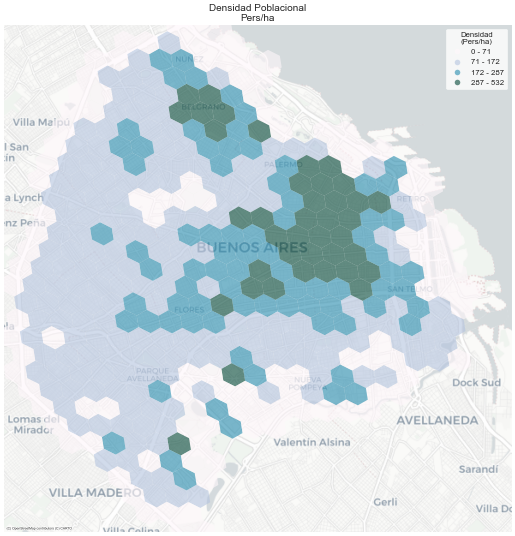

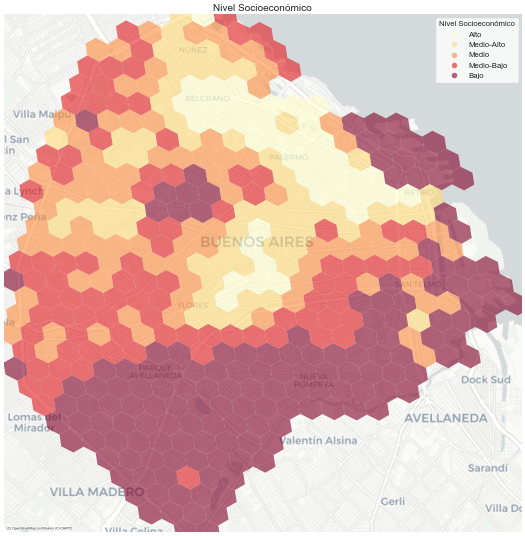

<Figure size 432x288 with 0 Axes>

In [18]:
pyomu.print_density_nse(hexs, 
                        population=population,
                        current_path = current_path, 
                        city=city)

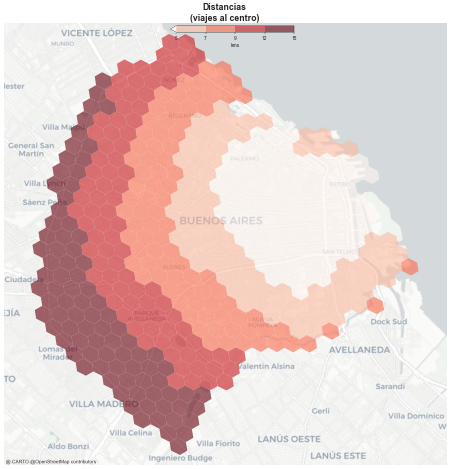

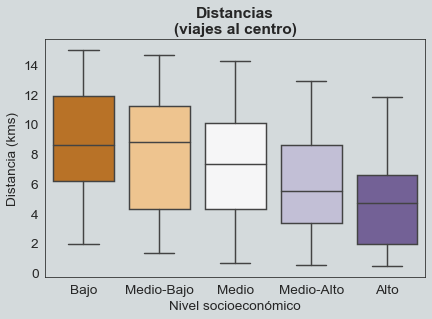

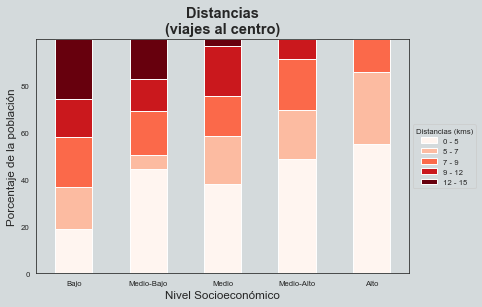

<Figure size 432x288 with 0 Axes>

In [19]:
od_matrix_avg = pyomu.calculate_avg_time_distance(hexs, 
                                                    od_matrix,                             
                                                    population=population)

pyomu.print_time_distance(hexs, 
                            od_matrix_avg, 
                            population=population,
                            indicators_vars=['distance_osm_walk_downtown'],
                            colors_dict={'distance_osm_walk_downtown':'Reds'},
                            current_path=current_path, 
                            city=city)

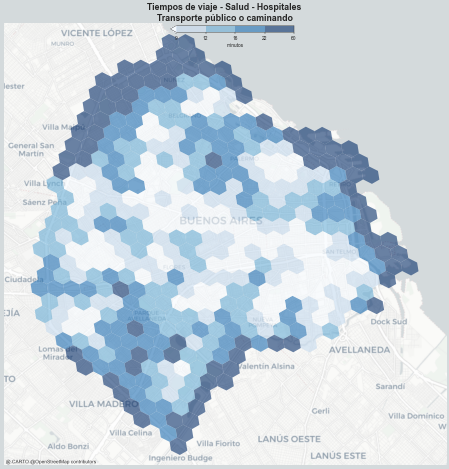

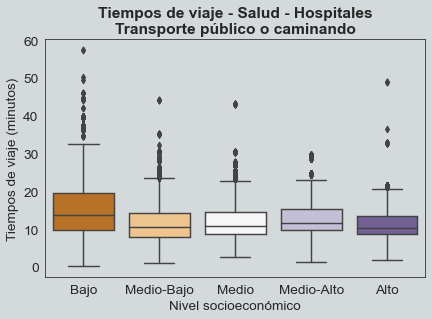

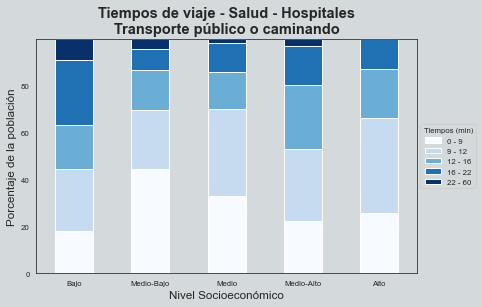

<Figure size 432x288 with 0 Axes>

In [20]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['duration'],
                        colors_dict={'duration':'Blues'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

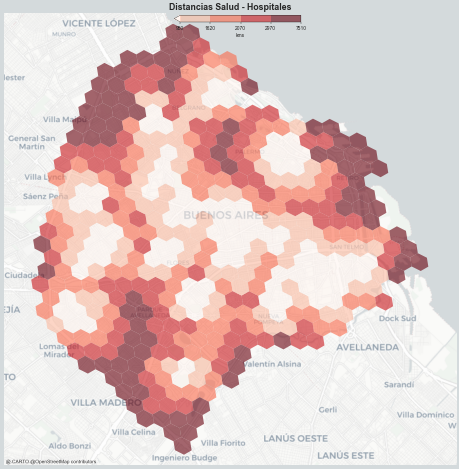

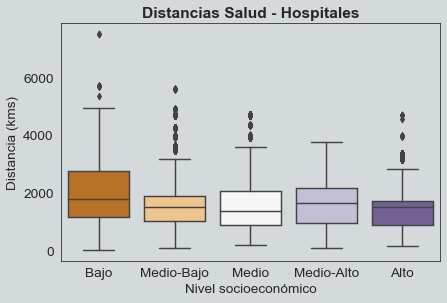

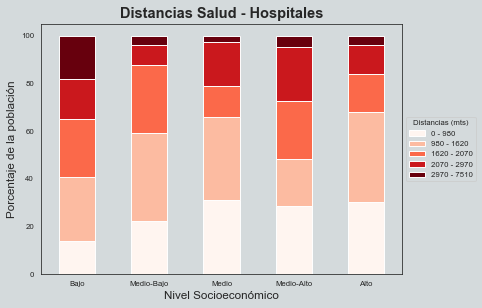

<Figure size 432x288 with 0 Axes>

In [21]:
pyomu.print_time_distance(hexs, 
                        od_establecimientos[od_establecimientos.oferta=='Hospitales'], 
                        population=population,
                        indicators_vars=['distance'],
                        colors_dict={'distance':'Reds'},
                        equipment_type = ['tipo', 'oferta'],
                        current_path=current_path, 
                        city=city)

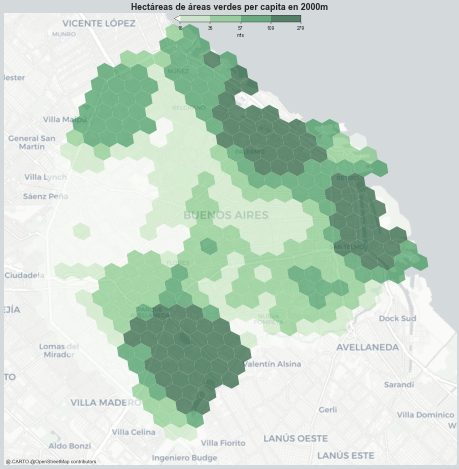

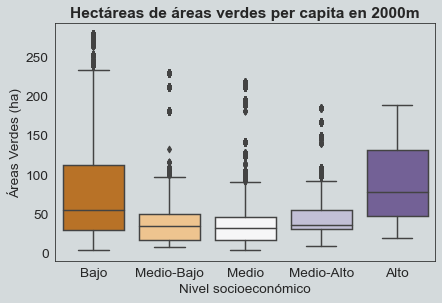

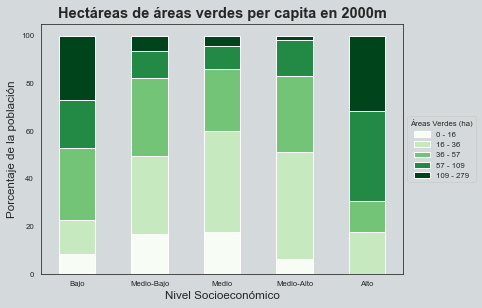

<Figure size 432x288 with 0 Axes>

In [22]:
pyomu.print_time_distance(hexs, 
                            hexs_green_space, 
                            population=population,
                            indicators_vars=['green_area_ha_in2000m'],
                            colors_dict={'green_area_ha_in2000m':'Greens'},                    
                            current_path=current_path)

# Crea powerpoints

In [23]:
pyomu.create_pptx(hexs,
                  od_matrix_all_day,
                  od_matrix,
                  od_establecimientos,                  
                  hexs_green_space,
                  population=population,
                  equipment_type=['tipo', 'oferta'],
                  current_path = current_path, 
                  city=city)


Densidad y nivel socioeconómico
Índicadores de día completo
Isocronas de tiempos y distancias


C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\geopandas\plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\sanap\miniconda3\envs\anapos\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)



Resultados_pptx\caba_Accesibilidad.pptx

Establecimientos

Resultados_pptx\caba_Establecimientos.pptx


<Figure size 432x288 with 0 Axes>